# Desafio - Semana 3

Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito.<br>Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

A resposta deve conter os valores da pontuação de crédito para cada estado do dataset:
- média
- mediana
- moda
- desvio padrão

 

__O arquivo para submissão deve estar em formato json__

#### Importando o Pandas

In [1]:
import pandas as pd

#### Carregando o Dataset


In [2]:
df = pd.read_csv('desafio1.csv', encoding = 'utf-8')
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


#### Análise dos Dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 12 columns):
RowNumber                   7000 non-null int64
id                          7000 non-null object
sobrenome                   7000 non-null object
pontuacao_credito           7000 non-null int64
estado_residencia           7000 non-null object
genero                      7000 non-null object
idade                       7000 non-null int64
nivel_estabilidade          7000 non-null int64
saldo_conta                 7000 non-null float64
numero_produtos             7000 non-null int64
possui_cartao_de_credito    7000 non-null int64
membro_ativo                7000 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 656.4+ KB


In [4]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [5]:
df.columns

Index(['RowNumber', 'id', 'sobrenome', 'pontuacao_credito',
       'estado_residencia', 'genero', 'idade', 'nivel_estabilidade',
       'saldo_conta', 'numero_produtos', 'possui_cartao_de_credito',
       'membro_ativo'],
      dtype='object')

In [6]:
df.pontuacao_credito.mean()

649.787

In [7]:
df.idade.mean().round()

39.0

In [8]:
df.saldo_conta.mean().round(2)

76471.88

In [9]:
df.genero.value_counts()

M    3791
F    3209
Name: genero, dtype: int64

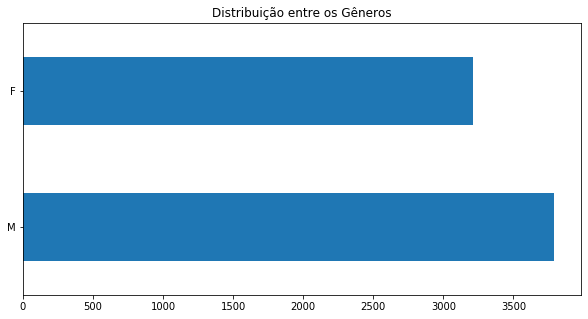

In [15]:
df.genero.value_counts().plot(kind='barh', figsize=(10,5), title='Distribuição entre os Gêneros')

In [11]:
df.possui_cartao_de_credito.value_counts()

1    4923
0    2077
Name: possui_cartao_de_credito, dtype: int64

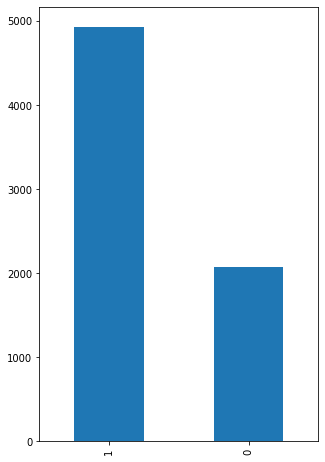

In [12]:
df.possui_cartao_de_credito.value_counts().plot(kind='bar', figsize=(5,8))

In [13]:
df.estado_residencia.value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

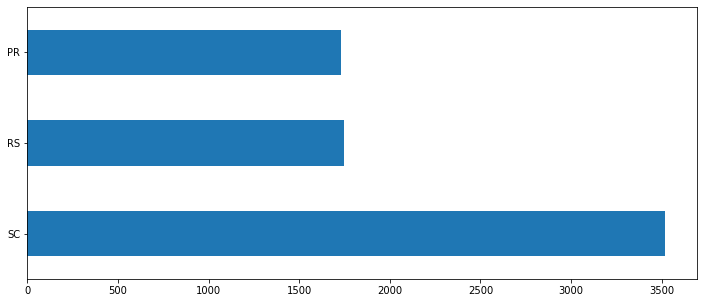

In [14]:
df.estado_residencia.value_counts().plot(kind='barh', figsize=(12,5))

#### Agrupando os dados

In [16]:
# Agrupando os dados por estados e calculando a moda, mediana, média e desvio padrão respectivamente.
# A função .agg do pandas permite aplicar várias operações em sequência no respectivo eixo.
submit = df.groupby('estado_residencia')['pontuacao_credito'].agg([pd.Series.mode, 'median', 'mean', 'std']).T

In [17]:
submit

estado_residencia,PR,RS,SC
mode,850.000000,850.000000,850.000000
median,650.000000,650.000000,653.000000
mean,648.961294,651.105143,649.537653
std,98.607186,95.136598,97.233493


In [18]:
# Renomeando as colunas para que seja salvo no formato apropriado requerido pelo desafio. 
submit.rename({'mode': 'moda', 'median': 'mediana', 'mean': 'media', 'std' : 'desvio_padrao'}, inplace = True)

In [19]:
submit

estado_residencia,PR,RS,SC
moda,850.000000,850.000000,850.000000
mediana,650.000000,650.000000,653.000000
media,648.961294,651.105143,649.537653
desvio_padrao,98.607186,95.136598,97.233493


#### Salvando o arquivo em .json

In [ ]:
submit.to_json('submission.json')